# Clustering Prototype - Initial Version
## Sentence embedding, dimensionality reduction, feature selection, clustering, and explaining clusters.

---

This file will allow you to set variables to run clustering and explainability on a dataset. In the next cell, you will be able to:

1.   Specify a dataset
     - [IMDB Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) for sentiment analysis
     - [Customer Support Ticket Dataset](https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset)
2.   Specify an embedding method
     - Sentence-BERT ([paper](https://arxiv.org/abs/1908.10084), [documentation](https://www.sbert.net/))
     - LLM2Vec ([paper](https://arxiv.org/abs/2404.05961), [GitHub](https://github.com/McGill-NLP/llm2vec))
2.   Flag if you would like dimensionality reduction (PCA) to occur
3.   Flag if you would like feature selection (decision trees) to occur

Based on these options, the file will run K-means clustering and labeling on the dataset.

Finally, it will prompt an LLM to explain the cluster groupings.

---


## Set options for clustering

For each of the sections in the following cell, uncomment the option you wish to use for each section and ensure the rest are commented out.

For embedding methods, the options are:
1. Sentence BERT
2. LLM2Vec

For dimensionality reduction, there is the option to enable or disable PCA.

For feature selection, there is the option to enable or disable decision trees.

For cluster count, there are options for the method of scoring (WCSS Elbow or SIlhouette Score), and the number of clusters.

In [1]:
# Dataset --------------------------------------------
dataset = "Synthetic_Customer_Data.csv"
text_col = "Conversation"
# dataset = "IMDB.csv"
# text_col = "review"
# label_col = "sentiment"
# dataset = "helpdesk_customer_tickets.csv"
# text_col =
# label_col =

# Embedding method -----------------------------------
method = "s_bert"
# method = "llm2vec"

# Dimensionality reduction (PCA) ---------------------
pca = True
# pca = False

# Feature selection (decision trees)  ----------------
# decision_trees = True
decision_trees = False

# Cluster count selection ----------------------------
cluster_count_method = "WCSS Elbow"
# cluster_count_method = "Silhouette Score"
# cluster_count = 10

## Imports and Requirements

This notebook was ran on a newly created venv through conda in order to gather the necessary requiremets. The venv was running Python 3.11.10.

The following packages were present:


| Name                     | Version        | Build                | Channel      |
|--------------------------|----------------|----------------------|--------------|
| appnope                  | 0.1.4          | pyhd8ed1ab_0         | conda-forge  |
| asttokens                | 2.4.1          | pyhd8ed1ab_0         | conda-forge  |
| bzip2                    | 1.0.8          | h6c40b1e_6           |              |
| ca-certificates          | 2024.9.24      | hecd8cb5_0           |              |
| certifi                  | 2024.8.30      | pypi_0               | pypi         |
| charset-normalizer       | 3.4.0          | pypi_0               | pypi         |
| comm                     | 0.2.2          | pyhd8ed1ab_0         | conda-forge  |
| contourpy                | 1.3.1          | pypi_0               | pypi         |
| cycler                   | 0.12.1         | pypi_0               | pypi         |
| debugpy                  | 1.8.8          | py311hc356e98_0      | conda-forge  |
| decorator                | 5.1.1          | pyhd8ed1ab_0         | conda-forge  |
| exceptiongroup           | 1.2.2          | pyhd8ed1ab_0         | conda-forge  |
| executing                | 2.1.0          | pyhd8ed1ab_0         | conda-forge  |
| filelock                 | 3.16.1         | pypi_0               | pypi         |
| fonttools                | 4.55.0         | pypi_0               | pypi         |
| fsspec                   | 2024.10.0      | pypi_0               | pypi         |
| huggingface-hub          | 0.26.2         | pypi_0               | pypi         |
| idna                     | 3.10           | pypi_0               | pypi         |
| importlib-metadata       | 8.5.0          | pyha770c72f_0        | conda-forge  |
| ipykernel                | 6.29.5         | pyh57ce528_0         | conda-forge  |
| ipython                  | 8.29.0         | pyh707e725_0         | conda-forge  |
| jedi                     | 0.19.2         | pyhff2d567_0         | conda-forge  |
| jinja2                   | 3.1.4          | pypi_0               | pypi         |
| joblib                   | 1.4.2          | pypi_0               | pypi         |
| jupyter_client           | 8.6.3          | pyhd8ed1ab_0         | conda-forge  |
| jupyter_core             | 5.7.2          | pyh31011fe_1         | conda-forge  |
| kiwisolver               | 1.4.7          | pypi_0               | pypi         |
| krb5                     | 1.21.3         | h37d8d59_0           | conda-forge  |
| libcxx                   | 19.1.3         | hf95d169_0           | conda-forge  |
| libedit                  | 3.1.20191231   | h0678c8f_2           | conda-forge  |
| libffi                   | 3.4.4          | hecd8cb5_1           |              |
| libsodium                | 1.0.20         | hfdf4475_0           | conda-forge  |
| markupsafe               | 3.0.2          | pypi_0               | pypi         |
| matplotlib               | 3.9.2          | pypi_0               | pypi         |
| matplotlib-inline        | 0.1.7          | pyhd8ed1ab_0         | conda-forge  |
| mpmath                   | 1.3.0          | pypi_0               | pypi         |
| ncurses                  | 6.4            | hcec6c5f_0           |              |
| nest-asyncio             | 1.6.0          | pyhd8ed1ab_0         | conda-forge  |
| networkx                 | 3.4.2          | pypi_0               | pypi         |
| numpy                    | 1.26.0         | pypi_0               | pypi         |
| openssl                  | 3.4.0          | hd471939_0           | conda-forge  |
| packaging                | 24.2           | pyhd8ed1ab_0         | conda-forge  |
| pandas                   | 2.2.3          | pypi_0               | pypi         |
| parso                    | 0.8.4          | pyhd8ed1ab_0         | conda-forge  |
| pexpect                  | 4.9.0          | pyhd8ed1ab_0         | conda-forge  |
| pickleshare              | 0.7.5          | py_1003              | conda-forge  |
| pillow                   | 11.0.0         | pypi_0               | pypi         |
| pip                      | 24.2           | py311hecd8cb5_0      |              |
| platformdirs             | 4.3.6          | pyhd8ed1ab_0         | conda-forge  |
| prompt-toolkit           | 3.0.48         | pyha770c72_0         | conda-forge  |
| psutil                   | 6.1.0          | py311h1314207_0      | conda-forge  |
| ptyprocess               | 0.7.0          | pyhd3deb0d_0         | conda-forge  |
| pure_eval                | 0.2.3          | pyhd8ed1ab_0         | conda-forge  |
| pygments                 | 2.18.0         | pyhd8ed1ab_0         | conda-forge  |
| pyparsing                | 3.2.0          | pypi_0               | pypi         |
| python                   | 3.11.10        | h4d6d9e5_0           |              |
| python-dateutil          | 2.9.0          | pyhd8ed1ab_0         | conda-forge  |
| python_abi               | 3.11           | 2_cp311              | conda-forge  |
| pytz                     | 2024.2         | pypi_0               | pypi         |
| pyyaml                   | 6.0.2          | pypi_0               | pypi         |
| pyzmq                    | 26.2.0         | py311h4d3da15_3      | conda-forge  |
| readline                 | 8.2            | hca72f7f_0           |              |
| regex                    | 2024.11.6      | pypi_0               | pypi         |
| requests                 | 2.32.3         | pypi_0               | pypi         |
| safetensors              | 0.4.5          | pypi_0               | pypi         |
| scikit-learn             | 1.5.2          | pypi_0               | pypi         |
| scipy                    | 1.14.1         | pypi_0               | pypi         |
| sentence-transformers    | 3.3.0          | pypi_0               | pypi         |
| setuptools               | 75.1.0         | py311hecd8cb5_0      |              |
| six                      | 1.16.0         | pyh6c4a22f_0         | conda-forge  |
| sqlite                   | 3.45.3         | h6c40b1e_0           |              |
| stack_data               | 0.6.2          | pyhd8ed1ab_0         | conda-forge  |
| sympy                    | 1.13.3         | pypi_0               | pypi         |
| threadpoolctl            | 3.5.0          | pypi_0               | pypi         |
| tk                       | 8.6.14         | h4d00af              |              |
| tokenizers               | 0.20.3         | pypi_0               | pypi         |
| torch                    | 2.2.2          | pypi_0               | pypi         |
| tornado                  | 6.4.1          | py311h3336109_1      | conda-forge  |
| tqdm                     | 4.67.0         | pypi_0               | pypi         |
| traitlets                | 5.14.3         | pyhd8ed1ab_0         | conda-forge  |
| transformers             | 4.46.2         | pypi_0               | pypi         |
| typing_extensions        | 4.12.2         | pyha770c72_0         | conda-forge  |
| tzdata                   | 2024.2         | pypi_0               | pypi         |
| urllib3                  | 2.2.3          | pypi_0               | pypi         |
| wcwidth                  | 0.2.13         | pyhd8ed1ab_0         | conda-forge  |
| wheel                    | 0.44.0         | py311hecd8cb5_0      |              |
| xz                       | 5.4.6          | h6c40b1e_1           |              |
| zeromq                   | 4.3.5          | h7130eaa_7           | conda-forge  |
| zipp                     | 3.21.0         | pyhd8ed1ab_0         | conda-forge  |
| zlib                     | 1.2.13         | h4b97444_1           |              |



---



The necesary installs will be dependent on what is present in your environment, however, these installs will be necessary if you are running on a fresh environment:

`!pip install transformers`

`!pip install torch`

`!pip install -U sentence-transformers`

`!pip install matplotlib`

`!pip install numpy==1.26`
Note: Numpy versions above 2 cause issues with the notebook

`!pip install pandas`

`!pip install llm2vec`
Note: This is only required if you intend on using LLM2Vec for embeddings.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

!env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True # Allow torch to allocate memory more effectively

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


SHELL=/bin/bash
NV_LIBCUBLAS_VERSION=12.2.5.6-1
NVIDIA_VISIBLE_DEVICES=all
COLAB_JUPYTER_TRANSPORT=ipc
NV_NVML_DEV_VERSION=12.2.140-1
NV_CUDNN_PACKAGE_NAME=libcudnn8
CGROUP_MEMORY_EVENTS=/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events
NV_LIBNCCL_DEV_PACKAGE=libnccl-dev=2.19.3-1+cuda12.2
NV_LIBNCCL_DEV_PACKAGE_VERSION=2.19.3-1
VM_GCE_METADATA_HOST=169.254.169.253
HOSTNAME=0f8d4dfe029f
LANGUAGE=en_US
TBE_RUNTIME_ADDR=172.28.0.1:8011
COLAB_TPU_1VM=
GCE_METADATA_TIMEOUT=3
NVIDIA_REQUIRE_CUDA=cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,driver<471 brand=tesla,driver>=525,driver<526 brand=unknown,driver>=525,driver<526 brand=nvidia,driver>=5

Note: There are some addition installs and imports that are only required if you intend on using LLM2Vec. The prerequisite to this is creating a HuggingFace account and [access token](https://huggingface.co/settings/tokens) (read-level token should suffice). In addition, you need to request gated repo access to the following:
- [Mistral-7B-Instruct-v0.2](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2)

In [3]:
if method == "llm2vec":
  !pip install llm2vec -q
  !huggingface-cli login

  from llm2vec import LLM2Vec
  import torch
  from transformers import AutoTokenizer, AutoModel, AutoConfig
  from peft import PeftModel

In [4]:
# Uncomment if running from Colab
from google.colab import files
uploaded = files.upload() # Choose the desired dataset to upload

Saving Synthetic_Customer_Data.csv to Synthetic_Customer_Data (2).csv


In [5]:
# Read dataset --------------------------------------------------------------
df = pd.read_csv(dataset)
df = df.sample(frac=0.05)
text = df[text_col]

In [6]:
# Calculate embeddings ------------------------------------------------------
# Note: this is a time-consuming step (~7 min)
if method == "s_bert":
  embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
  embeddings = embedding_model.encode(text.tolist(), convert_to_tensor=False)
elif method == "llm2vec":
  # Following code adapted from https://huggingface.co/McGill-NLP/LLM2Vec-Mistral-7B-Instruct-v2-mntp-supervised
  tokenizer = AutoTokenizer.from_pretrained(
      "McGill-NLP/LLM2Vec-Mistral-7B-Instruct-v2-mntp"
  )
  config = AutoConfig.from_pretrained(
      "McGill-NLP/LLM2Vec-Mistral-7B-Instruct-v2-mntp", trust_remote_code=True
  )
  model = AutoModel.from_pretrained(
      "McGill-NLP/LLM2Vec-Mistral-7B-Instruct-v2-mntp",
      trust_remote_code=True,
      config=config,
      torch_dtype=torch.bfloat16,
      device_map="cuda" if torch.cuda.is_available() else "cpu",
  )
  model = PeftModel.from_pretrained(
      model,
      "McGill-NLP/LLM2Vec-Mistral-7B-Instruct-v2-mntp",
  )
  model = model.merge_and_unload()  # This can take several minutes on CPU

  # Loading supervised model. This loads the trained LoRA weights on top of MNTP model. Hence the final weights are -- Base model + MNTP (LoRA) + supervised (LoRA).
  model = PeftModel.from_pretrained(
      model, "McGill-NLP/LLM2Vec-Mistral-7B-Instruct-v2-mntp-supervised"
  )

  # Wrapper for encoding and pooling operations
  l2v = LLM2Vec(model, tokenizer, pooling_mode="mean", max_length=512)

  embeddings = l2v.encode(text.tolist())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
# Dimensionality Reduction (PCA) --------------------------------------------
if pca:
  pca_model = PCA(n_components=2)
  embeddings = pca_model.fit_transform(embeddings)

## Incorporate feature selection using decision trees

"Shrink" or drop the non-important features with respect to the output class, and "expand" the features that are more important to determining the output class.

In [8]:
# Feature Selection (Decision Trees) ----------------------------------------
if decision_trees:
  X_train, X_test, y_train, y_test = train_test_split(embeddings, df[label_col], random_state = 8, test_size = 0.3)

  # Fit the decision tree model
  decision_tree_model = DecisionTreeClassifier()
  decision_tree_model.fit(X_train, y_train)

  # Access feature importances
  feature_importances = decision_tree_model.feature_importances_

  # Delete low-importance features
  low_importance_indices = np.where(feature_importances < 0.025)[0] # random sampling prob. -- 1/384 = 0.0026
  embeddings_small = np.delete(embeddings, low_importance_indices, axis=1)
  X_train_reduced = np.delete(X_train, low_importance_indices, axis=1)
  X_test_reduced = np.delete(X_test, low_importance_indices, axis=1)
  print(f"Embeddings went from size {len(X_train[0])} to {len(X_train_reduced[0])}")
else:
  embeddings_small = embeddings # because regardless of whether feature selection is performed the next section uses embeddings_small

## K-means clustering

First determine optimal number of clusters through either WCSS elbow point selection or silhouette score maximization.

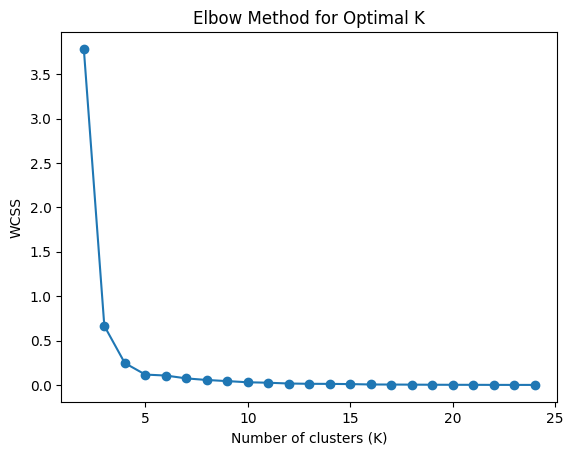

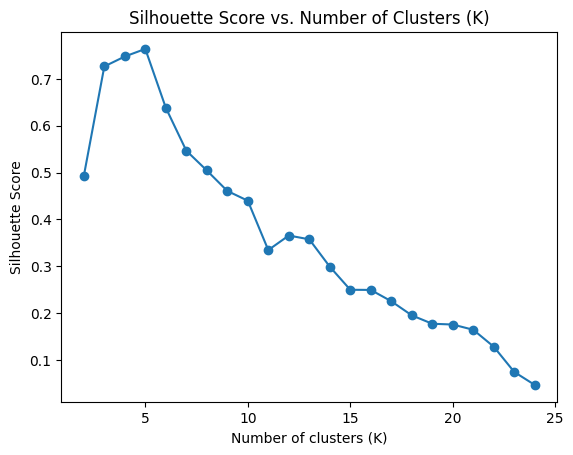

In [9]:
wcss_list = []  # within-cluster sum of squares
silhouette_scores_list = []

# Calculate WCSS for each K
upper_bound_k = 50
for k in range(2, min(upper_bound_k, embeddings_small.shape[0])):  # Choosing range from 1 to 50 for demonstration
    # wcss
    kmeans_experiment = KMeans(n_clusters=k, random_state=0)
    kmeans_experiment.fit(embeddings_small)
    wcss_list.append(kmeans_experiment.inertia_)

    labels = kmeans_experiment.fit_predict(embeddings_small)
    score = silhouette_score(embeddings_small, labels)
    silhouette_scores_list.append(score)

# Plot the WCSS values
plt.plot(range(2, min(upper_bound_k, embeddings_small.shape[0])), wcss_list, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Plot silhouette scores to find optimal K
plt.plot(range(2, min(upper_bound_k, embeddings_small.shape[0])), silhouette_scores_list, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

Determine optimal k. Either maximize Silhouette Score or estimate elbow point of WCSS chart.

In [10]:
if cluster_count_method == "Silhouette Score":
    max_index = np.argmax(silhouette_scores_list)
    num_clusters = max_index + 2 # index 0 corresponds to 2 clusters
elif cluster_count_method == "WCSS Elbow":
    # elbow point occurs when the difference of slopes of a point to its two neighbors is maximized
    neighbor_range = 3 # how many counts out to determine slopes
    neighbor_slope_difference = [abs(abs(wcss_list[i]-wcss_list[i+neighbor_range]) - abs(wcss_list[i-neighbor_range]-wcss_list[i]))
                                 for i in range(neighbor_range,len(wcss_list)-neighbor_range)]
    max_index = np.argmax(silhouette_scores_list)
    num_clusters = max_index + neighbor_range + 1 # index 0 corresponds to neighbor_range + 1 clusters



else:
    if isinstance(cluster_count_method, int):
        num_clusters = cluster_count_method
    else:
        print("ERROR: must choose valid cluster_count_method")


# Perform K-means clustering
# num_clusters = 5  # Define the number of clusters you want
print(f"Chosen number of clusters: {num_clusters}\ncluster_count_method: {cluster_count_method}")
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings_small)

# Print WCCS (within-cluster sum of squares) metric
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares:", wcss)

Chosen number of clusters: 7
cluster_count_method: WCSS Elbow
Within-Cluster Sum of Squares: 0.06249118968844414


## Find closest examples to cluster centroids

Currently, we are using cosine similarity to find the data point closest to the cluster centroids as a proxy for explaining or representing that cluster. We can also explore other ways (e.g. using LLMs) to explain clusters.

In [11]:
# For each cluster centroid, print the closest data point
corpus = list(df[text_col])
centroid_embeddings = kmeans.cluster_centers_
for i, centroid_vec in enumerate(centroid_embeddings):
    similarity_scores = util.cos_sim(centroid_vec, embeddings_small)
    closest_data_point = corpus[int(similarity_scores.argmax())]
    print(f"Centroid of cluster {i}:\n-----\n{closest_data_point}\n-----\n\n")

Centroid of cluster 0:
-----
bot: Hi Jonathan, Welcome to PureStream! How can I assist you today? ::: customer: Hey, my videos are buffering constantly even tho I have high-speed internet. It's super frustrating and I'm thinking about canceling my subscription. ::: bot: I'm really sorry to hear about the buffering issues, Jonathan. Let's see if we can fix this. Can you please tell me if this is happening on all devices or just one? ::: customer: It's on all my devices. My laptop, TV, and phone. ::: bot: I understand. Can you try restarting your router and modem? This can sometimes help resolve buffering issues. ::: customer: I already did that. It didn't help. ::: bot: Thank you for letting me know. Can you also ensure that PureStream is the only application using the internet while you're streaming? Sometimes other apps can consume bandwidth. ::: customer: Yeah, I made sure nothing else is using the internet. ::: bot: Okay, let's try adjusting the video quality settings in the PureStr

In [12]:
# Print a few data points from each cluster to also help with explainability
for i in range(num_clusters):
    print(f"\n\n\nCluster {i}:")
    samples = df[df['cluster'] == i][text_col].tolist()[:5]
    for s in samples:
        print("--")
        print(s)
    print("--")




Cluster 0:
--
bot: Hi Jane, Welcome to SnapStream support. How can I assist you today? ::: customer: hi I have a problem with frequent buffering and poor video quality even tho I have high-speed internet ::: bot: I'm sorry to hear about the buffering issues, Jane. Let me gather some details. Are you experiencing this issue with all videos or just specific content? ::: customer: it's with all videos not just specific ones ::: bot: Thank you for that information. I'll escalate this to our technical support team for further assistance. Please hold on for a moment. ::: agent: Hi Jane, I'm here to help. I understand you're facing buffering and video quality issues. Let's troubleshoot this together. Can you try restarting your streaming device and router, then check if the issue persists? ::: customer: ok I restarted both still having the same problem ::: agent: Thank you for trying that, Jane. Let's check your internet speed next. Please run a speed test on your device and let me know th